<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

В самостоятельном проекте вам нужно проанализировать данные о фондах и инвестициях и написать запросы к базе. 

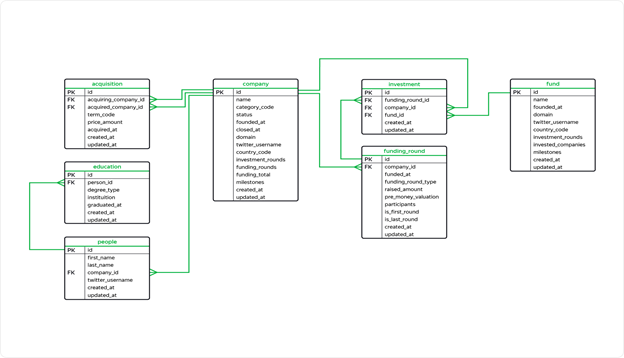

Отобразите все записи из таблицы company по компаниям, которые закрылись.

In [ ]:
SELECT *
FROM company 
WHERE status = 'closed';

Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле funding_total.

In [ ]:
SELECT funding_total
FROM company
WHERE category_code = 'news' AND country_code = 'USA'
ORDER BY funding_total DESC;

Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
SELECT SUM(price_amount)
FROM acquisition
WHERE EXTRACT(YEAR FROM CAST(acquired_at AS date)) BETWEEN 2011 AND 2013 AND term_code = 'cash'

Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'.

In [ ]:
SELECT first_name, last_name, twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%';

Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%' AND last_name LIKE 'K%';

Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
SELECT country_code, SUM(funding_total) AS sum_total
FROM company
GROUP BY country_code
ORDER BY sum_total DESC;


Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT funded_at, MIN(raised_amount), MAX(raised_amount)
FROM funding_round 
GROUP BY  funded_at
HAVING MIN(raised_amount) >0 AND MIN(raised_amount) <> MAX(raised_amount);

Создайте поле с категориями:
Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.
Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.
Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.
Отобразите все поля таблицы fund и новое поле с категориями.

In [ ]:
SELECT *,
    CASE
        WHEN invested_companies >= 100 THEN 'high_activity'
        WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
        WHEN invested_companies < 20 THEN 'low_activity'
        END
FROM fund;

Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
SELECT 
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity,
       ROUND(AVG(investment_rounds)) AS avg_rounds
FROM fund
GROUP BY activity
ORDER BY avg_rounds;

Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы. 
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. 
Выгрузите десять самых активных стран-инвесторов: отсортируйте таблицу по среднему количеству компаний от большего к меньшему. Затем добавьте сортировку по коду страны в лексикографическом порядке.

In [ ]:
SELECT country_code, MIN(invested_companies), MAX(invested_companies), AVG(invested_companies)
FROM fund
WHERE EXTRACT(YEAR FROM founded_at)  BETWEEN 2010 AND 2012 
GROUP BY country_code
HAVING MIN(invested_companies) > 0 
ORDER BY AVG(invested_companies) DESC, country_code
LIMIT 10;

Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.


In [ ]:
SELECT p.first_name, p.last_name, e.instituition
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id;

Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
SELECT c.name, COUNT(DISTINCT e.instituition)
FROM company AS c
LEFT JOIN people AS p ON c.id = p.company_id 
LEFT JOIN education AS e ON p.id = e.person_id 
GROUP BY c.id
ORDER BY COUNT(DISTINCT e.instituition) DESC
LIMIT 5;

Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
SELECT DISTINCT name
FROM funding_round AS fr
LEFT JOIN company AS c ON fr.company_id = c.id
WHERE is_first_round = 1 AND is_last_round = 1 AND status  = 'closed';

Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
WITH
    company_cut AS
    (
        SELECT DISTINCT(company.id)
        FROM funding_round
        LEFT JOIN company ON company.id = funding_round.company_id
        WHERE is_first_round = 1 AND is_last_round = 1
        AND company.status LIKE 'closed'
    )
SELECT DISTINCT(p.id)
FROM people AS p
WHERE p.company_id IN (
                       SELECT * 
                       FROM company_cut);

Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
WITH
    company_cut AS
    (
        SELECT DISTINCT(company.id)
        FROM funding_round
        LEFT JOIN company ON company.id = funding_round.company_id
        WHERE is_first_round = 1 AND is_last_round = 1
        AND company.status LIKE 'closed'
    )
SELECT DISTINCT(p.id), e.instituition
FROM people AS p
RIGHT JOIN education AS e ON p.id  = e.person_id 
WHERE p.company_id IN (
                       SELECT * 
                       FROM company_cut);

Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [ ]:
WITH
    company_cut AS
    (
        SELECT DISTINCT(company.id)
        FROM funding_round
        LEFT JOIN company ON company.id = funding_round.company_id
        WHERE is_first_round = 1 AND is_last_round = 1
        AND company.status LIKE 'closed'
    )
SELECT DISTINCT(p.id), COUNT(e.instituition)
FROM people AS p
RIGHT JOIN education AS e ON p.id  = e.person_id 
WHERE p.company_id IN (
                       SELECT * 
                       FROM company_cut)
GROUP BY p.id;

Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
WITH
    company_cut AS
    (
        SELECT DISTINCT(company.id)
        FROM funding_round
        LEFT JOIN company ON company.id = funding_round.company_id
        WHERE is_first_round = 1 AND is_last_round = 1
        AND company.status LIKE 'closed'
    )
SELECT AVG(e.institution_count)
FROM people AS p
RIGHT JOIN (
    SELECT DISTINCT(p.id), COUNT(e.instituition) AS institution_count
    FROM people AS p
    RIGHT JOIN education AS e ON p.id  = e.person_id 
    WHERE p.company_id IN (
                           SELECT * 
                           FROM company_cut)
    GROUP BY p.id) AS e ON p.id = e.id;

Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*.
*(сервис, запрещённый на территории РФ)

In [ ]:
WITH
    company_cut AS
    (
        SELECT DISTINCT(id)
        FROM  company 
        WHERE name LIKE 'Facebook'
    )
SELECT AVG(e.institution_count)
FROM people AS p
RIGHT JOIN (
    SELECT DISTINCT(p.id), COUNT(e.instituition) AS institution_count
    FROM people AS p
    RIGHT JOIN education AS e ON p.id  = e.person_id 
    WHERE p.company_id IN (
                           SELECT * 
                           FROM company_cut)
    GROUP BY p.id) AS e ON p.id = e.id;

Составьте таблицу из полей:
name_of_fund — название фонда;
name_of_company — название компании;
amount — сумма инвестиций, которую привлекла компания в раунде.
В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT  f.name  AS name_of_fund, c.name AS name_of_company, fr.raised_amount AS amount 
FROM investment AS i
INNER JOIN company  AS c ON i.company_id  = c.id
INNER JOIN fund  AS f ON i.fund_id = f.id
INNER JOIN funding_round AS fr ON i.funding_round_id = fr.id
WHERE c.milestones > 6 AND EXTRACT(YEAR FROM CAST(fr.funded_at AS date)) BETWEEN 2012 AND 2013;

Выгрузите таблицу, в которой будут такие поля:
название компании-покупателя;
сумма сделки;
название компании, которую купили;
сумма инвестиций, вложенных в купленную компанию;
доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.
Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы. 
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

In [ ]:
SELECT 
    c_acquiring.name, 
    a.price_amount, 
    c_acquired.name, 
    c_acquired.funding_total,
    ROUND(a.price_amount/c_acquired.funding_total)
FROM acquisition AS a
LEFT JOIN company AS c_acquiring ON a.acquiring_company_id = c_acquiring.id
LEFT JOIN company AS c_acquired ON a.acquired_company_id = c_acquired.id
WHERE a.price_amount > 0 AND c_acquired.funding_total > 0
ORDER BY a.price_amount DESC, c_acquired.name
LIMIT 10; 

Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
SELECT c.name, EXTRACT(MONTH FROM CAST(fr.funded_at AS date))
FROM company AS c
LEFT JOIN funding_round AS fr ON c.id = fr.company_id
WHERE 
    EXTRACT(YEAR FROM CAST(fr.funded_at AS date)) BETWEEN 2010 AND 2013 
    AND
    c.category_code = 'social'
    AND
    fr.raised_amount > 0;

Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
номер месяца, в котором проходили раунды;
количество уникальных названий фондов из США, которые инвестировали в этом месяце;
количество компаний, купленных за этот месяц;
общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH
    fund AS
        (
        SELECT EXTRACT(MONTH FROM CAST(fr.funded_at AS date)) AS month,
                COUNT(DISTINCT(f.name)) AS funds_name
        FROM funding_round AS fr
        INNER JOIN investment AS i ON fr.id = i.funding_round_id
        INNER JOIN fund AS f ON i.fund_id = f.id
        WHERE f.country_code = 'USA'
            AND EXTRACT(YEAR FROM CAST(fr.funded_at AS date)) BETWEEN 2010 AND 2013
        GROUP BY month),
    acquired AS
        (
        SELECT EXTRACT(MONTH FROM CAST(a.acquired_at AS date)) AS month,
                COUNT(a.acquired_company_id) AS count,
                SUM(a.price_amount) AS sum
        FROM acquisition AS a
        WHERE EXTRACT(YEAR FROM CAST(a.acquired_at AS date)) BETWEEN 2010 AND 2013
        GROUP BY month)
        
SELECT fu.month, fu.funds_name, ac.count, ac.sum
FROM acquired AS ac
INNER JOIN fund AS fu ON ac.month = fu.month;

Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH
     y_2011 AS (
         SELECT country_code AS country, AVG(funding_total) AS avg2011
         FROM company
         WHERE EXTRACT(YEAR FROM CAST(founded_at AS date)) = 2011
         GROUP BY country_code),
    y_2012 AS (
          SELECT country_code AS country, AVG(funding_total) AS avg2012
          FROM company
          WHERE EXTRACT(YEAR FROM CAST(founded_at AS date)) = 2012
          GROUP BY country_code),
    y_2013 AS (
          SELECT country_code AS country, AVG(funding_total) AS avg2013
          FROM company
          WHERE EXTRACT(YEAR FROM CAST(founded_at AS date)) = 2013
          GROUP BY country_code)
SELECT inv_2011.country, inv_2011.avg2011, inv_2012.avg2012, inv_2013.avg2013
FROM y_2011 AS inv_2011
INNER JOIN y_2012 AS inv_2012 ON inv_2011.country = inv_2012.country
INNER JOIN y_2013 AS inv_2013 ON inv_2012.country = inv_2013.country
ORDER BY inv_2011.avg2011 DESC;

**Дополнительные материалы**

Книги:

Мартин Грабер «SQL для простых смертных»

Материалы:

Хабр | шпаргалка по основам SQL https://habr.com/ru/articles/564390/

Хабр | «Как думать на SQL?» https://habr.com/ru/articles/305926/

Struchkov.dev | «Подзапросы SQL» https://struchkov.dev/blog/ru/select-subquery/

Андрей Созыкин | бесплатный SQL-курс https://www.asozykin.ru/courses/sql

Visual JOIN — визуализация различных видов JOIN в SQL https://joins.spathon.com/

SQL Fiddle — сервис для быстрого создания тестовых баз данных онлайн http://sqlfiddle.com/

«Руководство по стилю SQL» https://www.sqlstyle.guide/ru/

«Нормализация реляционных баз данных» https://club.shelek.ru/viewart.php?id=177

«Нормализация отношений. Шесть нормальных форм» https://habr.com/ru/articles/254773/